In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('email.csv')

In [3]:
df.sample(5)

,text,spam
1283,Subject: $ 14 . 95 per year domain names affo...,1
642,Subject: returned mail : see transcript for de...,1
5187,Subject: entouch newsletter business highligh...,0
394,Subject: upside pressure signals institutional...,1
4242,Subject: request submitted : access request fo...,0


In [4]:
df.shape

(5728, 2)

# 1. Data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
# check missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
# check for duplicate values
df.duplicated().sum()

33

In [8]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5695, 2)

## 2. EDA

In [11]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [12]:
df['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

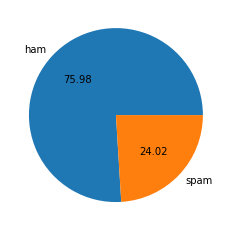

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [14]:
import seaborn as sns


<AxesSubplot:xlabel='spam', ylabel='count'>

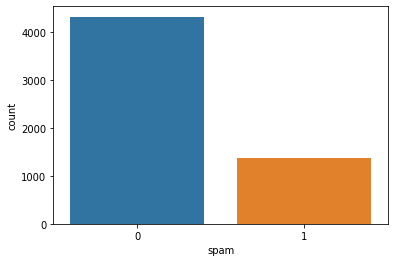

In [15]:
sns.countplot(x="spam", data = df)


# Data is imbalanced

In [16]:
import nltk

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5695, dtype: object

In [19]:
df['num_characters'] =  df['text'].apply(len)

In [20]:
df.head()

,text,spam,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [21]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [22]:
df.head()

,text,spam,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,9
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,5


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,15.883231
std,2047.078711,419.654234,26.653283
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,6.000000
50%,979.000000,211.000000,10.000000
75%,1893.000000,403.000000,18.000000
max,43952.000000,8479.000000,1229.000000


In [26]:
#spam
df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,16.097065
std,1965.016383,407.227757,28.170659
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,6.000000
50%,1122.000000,240.000000,11.000000
75%,2037.500000,440.500000,19.000000
max,43952.000000,8479.000000,1229.000000


In [27]:
#ham 
df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,15.206871
std,2271.372893,451.623124,21.143714
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,5.000000
50%,693.500000,141.000000,9.000000
75%,1250.250000,252.000000,16.000000
max,28432.000000,6131.000000,329.000000


In [28]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

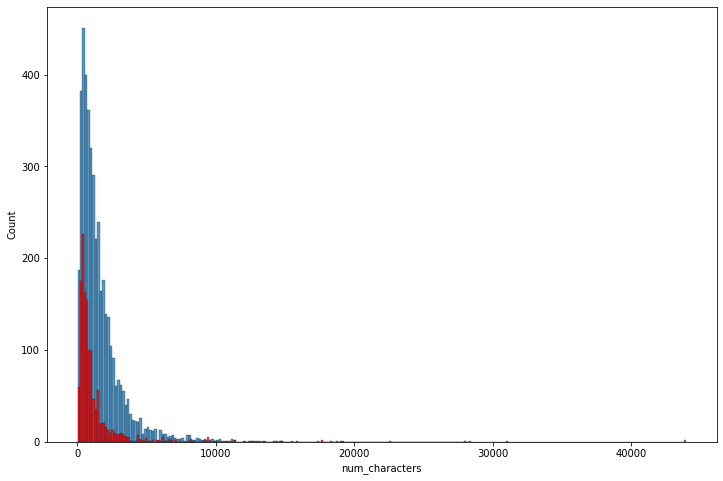

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

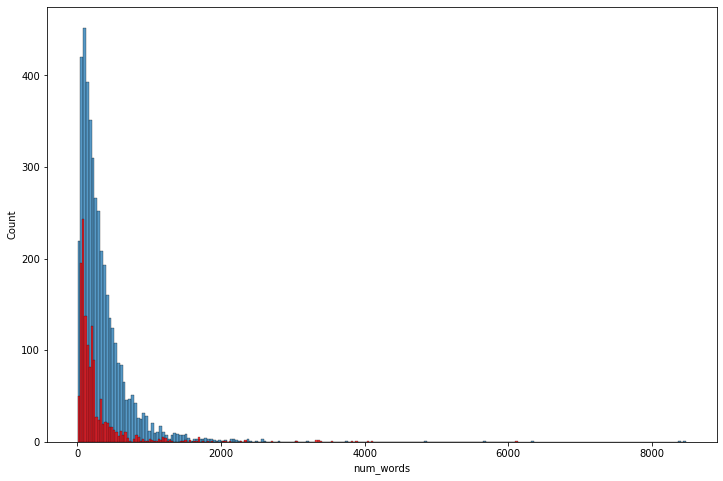

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

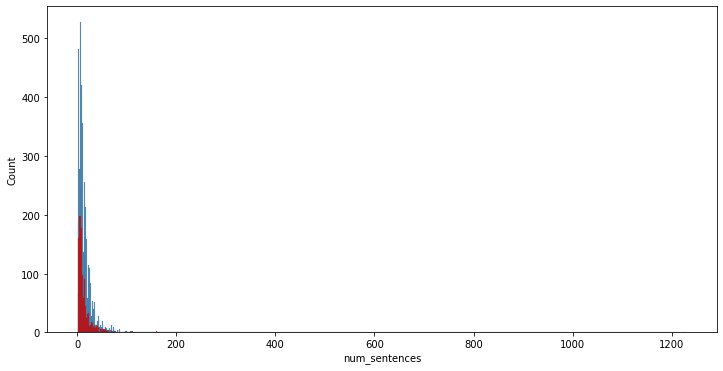

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 0]['num_sentences'])
sns.histplot(df[df['spam'] == 1]['num_sentences'],color='red')

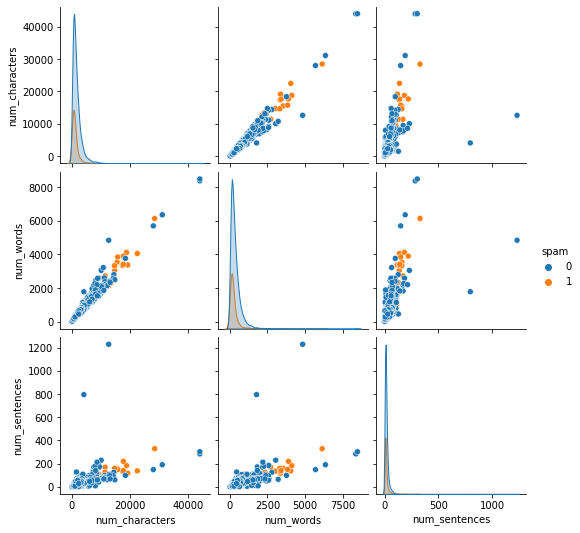

In [32]:
sns.pairplot(df,hue='spam')

<AxesSubplot:>

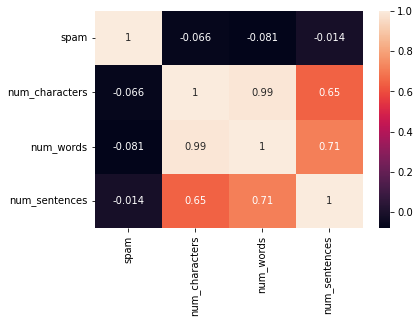

In [33]:
sns.heatmap(df.corr(),annot=True)

## 3. Data preprocessing
- Lower case
- Tokenization
- Removing special
- Removing stop words and punctuation
- Stemming

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
       if i.isalnum():
           y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
       if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:   
       y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [38]:
transform_text('I love the youtube lecture on Machine Learning. How about you? % # $')

'love youtub lectur machin learn'

In [39]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,9,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,5,subject money get softwar cd softwar compat gr...


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['spam'] == 1]['transformed_text'].str.cat(sep=""))

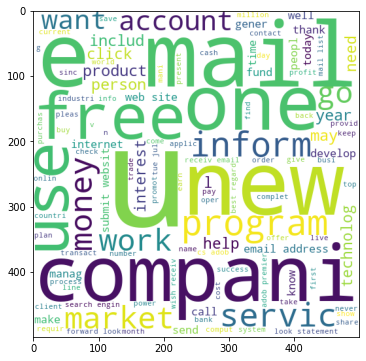

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep=""))

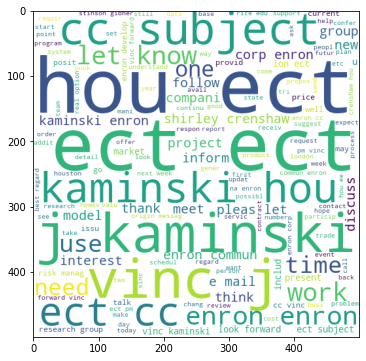

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,9,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,5,subject money get softwar cd softwar compat gr...


In [48]:
spam_corpus = []
for msg in df[df['spam'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

174630

c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


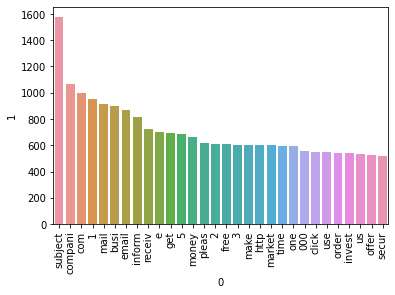

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['spam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

702991

c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


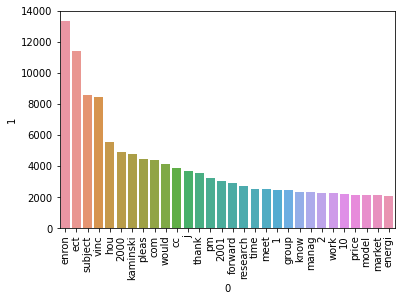

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [54]:
# Build Naive Bayes Model/Algorithm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [55]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
x.shape

(5695, 29220)

In [57]:
y = df['spam'].values

In [58]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9490781387181738
[[836  13]
 [ 45 245]]
0.9496124031007752


In [64]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8770851624231782
[[847   2]
 [138 152]]
0.987012987012987


In [65]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9885864793678666
[[845   4]
 [  9 281]]
0.9859649122807017


# tfidf --> MNB

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    # 'AdaBoost': abc,
    # 'BgC': bc,
    # 'ETC': etc,
    # 'GBDT' :gbdt,
    # 'xgb' :xgb,
}

In [69]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [70]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9912203687445127, 0.9929577464788732)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9912203687445127
Precision -  0.9929577464788732
For KN
Accuracy -  0.9762949956101844
Precision -  0.9816849816849816
For NB
Accuracy -  0.8770851624231782
Precision -  0.987012987012987
For DT
Accuracy -  0.9271290605794557
Precision -  0.8017492711370262
For LR
Accuracy -  0.9736611062335382
Precision -  0.9482758620689655
For RF
Accuracy -  0.9762949956101844
Precision -  1.0


In [72]:
# perfromance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_score,'Precision':precision_score}).sort_values('Precision',ascending=False)

In [73]:
# perfromance_df

In [74]:
# perfromance_df1 = pd.melt(perfromance_df, id_vars = "Algorithm")

In [75]:
# perfromance_df1

In [76]:
# sns.catplot (x = 'Algorithm', y = 'value', hue = 'variable',data=perfromance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()